<a href="https://colab.research.google.com/github/olesjaeidelman/Unit2-Assignment/blob/main/Capstone_Project_Final_20220509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project:

Citi Bike within NYC is one of the largest bike-sharing systems in the US. I will be analyzing 3 years of data to get understanding of trends and year over year analysis.

Some of questions I would like to explore:
-	Where are people going?
-	When are they going?
-	What are the differences between member vs. casual customers?
-	What are average trip durations?
-	What are the most popular destinations?

Data was downloaded from:
https://s3.amazonaws.com/tripdata/index.html


# Data Load

In [ ]:
#Import all libraries that will be used for analysis
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
#Import the datasets that will be used for analysis. All citibike data is uploaded monthly, so I downloaded 3 full years of data plus 4 months of 2022.
#I apreciated all monthly file having consitent names, which made uploading them much easier.
df_202204 = pd.read_csv('/content/JC-202204-citibike-tripdata.csv')

In [ ]:
df_202203 = pd.read_csv('/content/JC-202203-citibike-tripdata.csv')

In [ ]:
df_202202 = pd.read_csv('/content/JC-202202-citibike-tripdata.csv')

In [ ]:
df_202201 = pd.read_csv('/content/JC-202201-citibike-tripdata.csv')

In [ ]:
df_202204.shape

(62528, 13)

In [ ]:
df_202201.shape

(26762, 13)

In [ ]:
#Loop that loads 2021 data. It appears that layout has changed in starting in February 2021. I am going to load 2/2021 through 12/2021 and keep January 2021 with the old layout data.
file_name = '/content/JC-{}-citibike-tripdata.csv'
df_2021 = pd.concat([pd.read_csv(file_name.format(i)) for i in range(202102, 202113)])

In [ ]:
#Display total records for year 2021 - new layout
df_2021.shape

(632819, 13)

In [ ]:
#Loading 1/2021 data as a separate file to be combined with the old layout data
df_202101 = pd.read_csv('/content/JC-202101-citibike-tripdata.csv')

In [ ]:
df_202101

**Review layout discrepancies and fields mapping.**
Most of the fields could be easily mapped from old layout to new.

*   rideable_type has not corresponding field in the old file, will be removed from analysis
*   ride_id and bikeid are not equivalent; old layout does not have unique record identifier
*   usertype will be used to calculate member_casual flag for the old layout data.



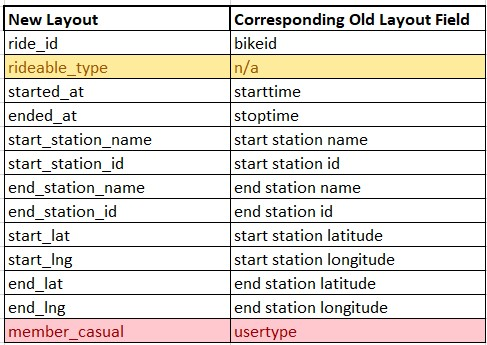



In [ ]:
#Columns names from the file with new layout
df_2021.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
#Column names from the old layout file
df_202012.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
#Loop that loads 2020 data. 
file_name = '/content/JC-{}-citibike-tripdata.csv'
df_2020 = pd.concat([pd.read_csv(file_name.format(i)) for i in range(202001, 202013)])

In [ ]:
#Display total records for year 2020 - old layout
df_2020.shape

(336802, 15)

In [ ]:
#Loop that loads 2019 data. 
file_name = '/content/JC-{}-citibike-tripdata.csv'
df_2019 = pd.concat([pd.read_csv(file_name.format(i)) for i in range(201901, 201913)])

In [ ]:
#Display total records for year 2019 - old layout
df_2019.shape

(404947, 15)

**Review member_casual flag (new layout) vs. usertype (old layout).**
New file layout has member_casual indicator that distingushes members from casual riders. Corresponding values on the old layout are: subscriber and customer.

In [ ]:
#Show counts by member_casual for 2021
df_2021.groupby(['member_casual'])['ride_id'].count().sort_values(ascending = False)

member_casual
member    374366
casual    258453
Name: ride_id, dtype: int64

In [ ]:
#Show counts by member_casual for 2019
df_2019.groupby(['usertype'])['bikeid'].count().sort_values(ascending = False)

usertype
Subscriber    361921
Customer       43026
Name: bikeid, dtype: int64

**Combine all old layout file into the single old_layout data frame.**
Months included:

*   df_2019 (January 2019 through December 2019)
*   df_2020 (January 2020 through December 2020)
*   df_202101 (January 2021) - the only month in 2021 formatted using old layout.


In [ ]:
#Combine all old layout files
frames = [df_2019, df_2020, df_202101]
old_layout = pd.concat(frames)

In [ ]:
#Display total number of records for the data in the old layout.
old_layout.shape

(753373, 15)

In [ ]:
old_layout.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,7.533730e+05,753373.000000,753373.000000,753373.000000,753373.000000,753373.000000,753373.000000,753373.000000,753373.000000,753373.000000
mean,1.109335e+03,3298.634042,40.722496,-74.046535,3297.032714,40.722064,-74.045869,34113.535186,1981.355676,1.132395
std,1.408558e+04,177.382181,0.007186,0.011360,185.105062,0.066729,0.121175,7446.241616,10.636907,0.571599
min,6.100000e+01,3183.000000,40.709651,-74.083639,82.000000,0.000000,-74.083639,14531.000000,1887.000000,0.000000
25%,2.600000e+02,3195.000000,40.717732,-74.050656,3193.000000,40.717732,-74.050389,29232.000000,1973.000000,1.000000
50%,4.290000e+02,3209.000000,40.721525,-74.043845,3209.000000,40.721124,-74.043117,29595.000000,1984.000000,1.000000
75%,8.640000e+02,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.038051,42342.000000,1989.000000,1.000000
max,3.261756e+06,3792.000000,40.748716,-74.032108,4071.000000,40.848282,0.000000,49985.000000,2004.000000,2.000000


In [ ]:
#Find out how much duplication we have in the "old" layout daya. There are over 26Kdups
old_layout[old_layout.duplicated(keep=False)]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
40382,156,2020-10-01 00:02:40.2600,2020-10-01 00:05:17.0140,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,42293,Subscriber,1996,1
40383,143,2020-10-01 00:02:53.5020,2020-10-01 00:05:16.9650,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,44740,Subscriber,1998,1
40384,305,2020-10-01 00:04:31.3160,2020-10-01 00:09:36.3840,3273,Manila & 1st,40.721651,-74.042884,3269,Brunswick & 6th,40.726012,-74.050389,41369,Subscriber,1988,2
40385,1097,2020-10-01 00:05:18.3680,2020-10-01 00:23:36.1240,3199,Newport Pkwy,40.728745,-74.032108,3281,Leonard Gordon Park,40.745910,-74.057271,42285,Customer,2001,1
40386,277,2020-10-01 00:09:17.5990,2020-10-01 00:13:55.5150,3199,Newport Pkwy,40.728745,-74.032108,3638,Washington St,40.724294,-74.035483,45231,Subscriber,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13449,270,2020-10-13 15:05:35.0860,2020-10-13 15:10:05.3430,3207,Oakland Ave,40.737604,-74.052478,3640,Journal Square,40.733670,-74.062500,44744,Subscriber,1963,2
13452,400,2020-10-13 15:09:03.4890,2020-10-13 15:15:43.9750,3209,Brunswick St,40.724176,-74.050656,3209,Brunswick St,40.724176,-74.050656,45345,Subscriber,1984,1
13455,206,2020-10-13 15:11:34.3500,2020-10-13 15:15:00.5030,3195,Sip Ave,40.730897,-74.063913,3194,McGinley Square,40.725340,-74.067622,47019,Subscriber,1993,1
13456,216,2020-10-13 15:11:49.1510,2020-10-13 15:15:25.6930,3195,Sip Ave,40.730897,-74.063913,3225,Baldwin at Montgomery,40.723659,-74.064194,42191,Subscriber,1966,1


In [ ]:
#Review dup records example
old_layout[(old_layout['bikeid'] ==42293) & (old_layout['start station name'] == 'Grove St PATH') & (old_layout['tripduration'] == 156)]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
40382,156,2020-10-01 00:02:40.2600,2020-10-01 00:05:17.0140,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,42293,Subscriber,1996,1
0,156,2020-10-01 00:02:40.2600,2020-10-01 00:05:17.0140,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,42293,Subscriber,1996,1


In [ ]:
#Remove duplicated rows
old_layout = old_layout.drop_duplicates()

In [ ]:
old_layout

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,2476,2021-01-31 20:16:05.4700,2021-01-31 20:57:22.0110,3187,Warren St,40.721124,-74.038051,3483,Montgomery St,40.719420,-74.050990,44852,Subscriber,1958,1
11620,147,2021-01-31 21:05:05.2090,2021-01-31 21:07:32.8660,3186,Grove St PATH,40.719586,-74.043117,3187,Warren St,40.721124,-74.038051,46538,Subscriber,1972,1
11621,660,2021-01-31 21:06:23.5880,2021-01-31 21:17:23.8420,3211,Newark Ave,40.721525,-74.046305,3276,Marin Light Rail,40.714584,-74.042817,44398,Subscriber,1987,2
11622,384,2021-01-31 21:16:37.8220,2021-01-31 21:23:02.1240,3205,JC Medical Center,40.716540,-74.049638,3268,Lafayette Park,40.713464,-74.062859,41400,Subscriber,1989,1


In [ ]:
#counts by bikeid - not a good candidate for unique id
old_layout.groupby(['bikeid'])['bikeid'].count().sort_values(ascending = False)

bikeid
29286    1206
29210    1127
26155    1121
26159    1114
29586    1108
         ... 
30501       1
37018       1
37734       1
33974       1
36894       1
Name: bikeid, Length: 2012, dtype: int64

**Combine all new layout files into the single new_layout data frame.**
Months included:

*   df_2021 (February 2021 through December 2021)
*   df_202201 - January 2022
*   df_202202 - February 2022
*   df_202203 - March 2022
*   df_202204 - April 2022

In [ ]:
#Combine all new layout files
frames = [df_2021, df_202201, df_202202, df_202203, df_202204]
new_layout = pd.concat(frames)

In [ ]:
#Display total records for new layout data
new_layout.shape

(805691, 13)

In [ ]:
#Exported new layout data as csv file
new_layout.to_csv(r'/content/new_layout.csv')

In [ ]:
#Exported old layout data as csv file
old_layout.to_csv(r'/content/old_layout.csv')

In [ ]:
#Find out how much duplication we have in the "new" layout data. There are no records that are entirely duplicated
new_layout[new_layout.duplicated(keep=False)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [ ]:
#counts by ride_id - all ride_id numbers are unique
new_layout.groupby(['ride_id'])['ride_id'].count().sort_values(ascending = False)

ride_id
000020AA6F6478B4    1
AAAF60528A17902C    1
AAAF84C56F73D73E    1
AAAF9B362228A49C    1
AAAFCD8A6BEF019A    1
                   ..
553B9AAFE506679F    1
553B9EC418B947AA    1
553BE4D0CE102ACA    1
553BECD3739EE7C4    1
FFFFE9FD83E1C761    1
Name: ride_id, Length: 805691, dtype: int64

In [ ]:
#Review sample data in the new layout file.
new_layout

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,121DD7DD23CB1335,docked_bike,2021-02-03 23:11:28,2021-02-03 23:18:28,Hoboken Ave at Monmouth St,JC105,Christ Hospital,JC034,40.735208,-74.046964,40.734786,-74.050444,member
1,FD73FB85F008349D,docked_bike,2021-02-27 16:34:05,2021-02-27 16:56:40,Newport Pkwy,JC008,Marin Light Rail,JC013,40.728744,-74.032108,40.714584,-74.042817,member
2,39F9E6663CB5FDF6,docked_bike,2021-02-26 23:16:04,2021-02-26 23:22:25,Journal Square,JC103,Baldwin at Montgomery,JC020,40.733670,-74.062500,40.723659,-74.064194,member
3,A64745CB0792EC6F,docked_bike,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,casual
4,75CC76EB9543764A,docked_bike,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62523,13C1C453508F048A,classic_bike,2022-04-24 12:52:09,2022-04-24 13:06:24,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,9 St HBLR - Jackson St & 8 St,HB305,40.736982,-74.027781,40.747907,-74.038412,member
62524,B7E454B8886D7826,electric_bike,2022-04-30 11:45:56,2022-04-30 11:54:30,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,12 St & Sinatra Dr N,HB201,40.736982,-74.027781,40.750604,-74.024020,member
62525,20D6A9E7C8291984,classic_bike,2022-04-28 14:28:34,2022-04-28 14:41:35,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Bloomfield St & 15 St,HB203,40.736982,-74.027781,40.754530,-74.026580,member
62526,2AEB863A4F683CAE,electric_bike,2022-04-09 17:37:14,2022-04-09 17:46:45,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Bloomfield St & 15 St,HB203,40.736982,-74.027781,40.754530,-74.026580,casual


# Old Layout Transformations

**Old layout data will need some additional work to get it to the format similar to new layout:**


1.   Create unique identifier for each row
2.   Rename columns
3.   Create member_casual flag based on user type values
4.   Delete columns that will not be used in review





**1 - Create unique identifier for each row**

In [ ]:
#Create a column with unique identifier, call it a ride_id (similar to new layout naming standard)
old_layout['ride_id'] = old_layout[['starttime', 'stoptime']].sum(axis=1).map(hash)

In [ ]:
#Confirm that new id is unique per row
old_layout.groupby(['ride_id'])['ride_id'].count().sort_values(ascending = False)

ride_id
-9223362920283930236    1
 3069051503152364784    1
 3069055695233037997    1
 3069059621338838005    1
 3069100788255618155    1
                       ..
-3076916353240359624    1
-3076909819166958201    1
-3076906126664149162    1
-3076902264177774897    1
 9223338224044793451    1
Name: ride_id, Length: 739922, dtype: int64

In [ ]:
#Review sample data with generated ID
old_layout

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ride_id
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,-927111889993607988
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,60375718380071945
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,8013934239559827907
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,-6129630042453220366
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,4947673062031341031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,2476,2021-01-31 20:16:05.4700,2021-01-31 20:57:22.0110,3187,Warren St,40.721124,-74.038051,3483,Montgomery St,40.719420,-74.050990,44852,Subscriber,1958,1,2920833964331110830
11620,147,2021-01-31 21:05:05.2090,2021-01-31 21:07:32.8660,3186,Grove St PATH,40.719586,-74.043117,3187,Warren St,40.721124,-74.038051,46538,Subscriber,1972,1,272790662821841908
11621,660,2021-01-31 21:06:23.5880,2021-01-31 21:17:23.8420,3211,Newark Ave,40.721525,-74.046305,3276,Marin Light Rail,40.714584,-74.042817,44398,Subscriber,1987,2,2821228143773733195
11622,384,2021-01-31 21:16:37.8220,2021-01-31 21:23:02.1240,3205,JC Medical Center,40.716540,-74.049638,3268,Lafayette Park,40.713464,-74.062859,41400,Subscriber,1989,1,2213943218797875796


**2 - Rename columns**

In [ ]:
#List all column names in the old layout file for the reference:
old_layout.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'ride_id'],
      dtype='object')

In [ ]:
#Rename columns to match new layout
old_layout.rename(columns = {'starttime':'started_at', 'stoptime':'ended_at', 
                             'start station id':'start_station_id','start station name':'start_station_name', 
                             'start station latitude':'start_lat','start station longitude':'start_lng', 
                             'end station id':'end_station_id', 'end station name':'end_station_name',
                             'end station latitude':'end_lat', 'end station longitude':'end_lng' }, inplace = True)

**3 - Create member_casual flag based on user type values**

In [ ]:
#Generate subscriber vs. customer counts for comparison:
old_layout.groupby(['usertype'])['bikeid'].count().sort_values(ascending = False)

usertype
Subscriber    593938
Customer      145984
Name: bikeid, dtype: int64

In [ ]:
#Create new column that maps old user types to the new member_casual flag. Assume "Subscriber" is the same as "member" and "Customer" is the same as "casual"
usertype_mapping = [
    (old_layout['usertype'] == 'Subscriber'),
    (old_layout['usertype'] == 'Customer')
    ]

#Create a list of the names we want to assign
names = ['member', 'casual']

#Create a new column and use np.select to assign names to it using our lists as arguments
old_layout['member_casual'] = np.select(usertype_mapping, names)

#Display updated DataFrame to confirm all column editions
old_layout.head()

,tripduration,started_at,ended_at,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bikeid,usertype,birth year,gender,ride_id,member_casual
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,-927111889993607988,member
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,60375718380071945,member
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,8013934239559827907,member
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,-6129630042453220366,casual
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,4947673062031341031,casual


In [ ]:
#confirm that counts on the new fields match subscriber/customer counts
old_layout.groupby(['member_casual'])['ride_id'].count().sort_values(ascending = False)

member_casual
member    593938
casual    145984
Name: ride_id, dtype: int64

**4 - Delete columns that will not be used in review**

In [ ]:
#Remove columns that I am not going to use
drop_cols = ['bikeid','birth year', 'gender','usertype','tripduration']
old_layout.drop(drop_cols, inplace = True, axis = 1)

# Combined Data January 2019 - April 2022

In [ ]:
#combine new layout and old layout records
frames = [old_layout, new_layout]
df = pd.concat(frames)

In [ ]:
#Review sample data and the file size
df

,started_at,ended_at,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,ride_id,member_casual,rideable_type
0,2019-01-01 03:09:09.711000,2019-01-01 03:12:30.879000,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,-927111889993607988,member,NaN
1,2019-01-01 05:18:00.106000,2019-01-01 05:26:25.905000,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,60375718380071945,member,NaN
2,2019-01-01 10:36:33.340000,2019-01-01 10:49:10.260000,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,8013934239559827907,member,NaN
3,2019-01-01 12:43:38.643000,2019-01-01 13:09:54.528000,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,-6129630042453220366,casual,NaN
4,2019-01-01 12:43:39.601000,2019-01-01 13:09:46.510000,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,4947673062031341031,casual,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62523,2022-04-24 12:52:09,2022-04-24 13:06:24,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,40.736982,-74.027781,HB305,9 St HBLR - Jackson St & 8 St,40.747907,-74.038412,13C1C453508F048A,member,classic_bike
62524,2022-04-30 11:45:56,2022-04-30 11:54:30,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,40.736982,-74.027781,HB201,12 St & Sinatra Dr N,40.750604,-74.024020,B7E454B8886D7826,member,electric_bike
62525,2022-04-28 14:28:34,2022-04-28 14:41:35,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,40.736982,-74.027781,HB203,Bloomfield St & 15 St,40.754530,-74.026580,20D6A9E7C8291984,member,classic_bike
62526,2022-04-09 17:37:14,2022-04-09 17:46:45,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,40.736982,-74.027781,HB203,Bloomfield St & 15 St,40.754530,-74.026580,2AEB863A4F683CAE,casual,electric_bike


In [ ]:
#Review data types
df.dtypes

started_at             object
ended_at               object
start_station_id       object
start_station_name     object
start_lat             float64
start_lng             float64
end_station_id         object
end_station_name       object
end_lat               float64
end_lng               float64
ride_id                object
member_casual          object
rideable_type          object
dtype: object

In [ ]:
#Convert start and end dates to datetime, so that they could be used with date-related functions
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [ ]:
#calculate duration between start and end date and compare it to tripduration
df['diff_minutes'] = df['ended_at'] - df['started_at']
df['diff_minutes']=df['diff_minutes']/np.timedelta64(1,'m')

In [ ]:
#Remove columns that I am not going to use
drop_cols = ['rideable_type']
df.drop(drop_cols, inplace = True, axis = 1)

In [ ]:
#Review sample data with minutes difference calculation
df

,started_at,ended_at,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,ride_id,member_casual,diff_minutes
0,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,-927111889993607988,member,3.352800
1,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,60375718380071945,member,8.429983
2,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,8013934239559827907,member,12.615333
3,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,-6129630042453220366,casual,26.264750
4,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,4947673062031341031,casual,26.115150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62523,2022-04-24 12:52:09.000,2022-04-24 13:06:24.000,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,40.736982,-74.027781,HB305,9 St HBLR - Jackson St & 8 St,40.747907,-74.038412,13C1C453508F048A,member,14.250000
62524,2022-04-30 11:45:56.000,2022-04-30 11:54:30.000,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,40.736982,-74.027781,HB201,12 St & Sinatra Dr N,40.750604,-74.024020,B7E454B8886D7826,member,8.566667
62525,2022-04-28 14:28:34.000,2022-04-28 14:41:35.000,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,40.736982,-74.027781,HB203,Bloomfield St & 15 St,40.754530,-74.026580,20D6A9E7C8291984,member,13.016667
62526,2022-04-09 17:37:14.000,2022-04-09 17:46:45.000,HB103,South Waterfront Walkway - Sinatra Dr & 1 St,40.736982,-74.027781,HB203,Bloomfield St & 15 St,40.754530,-74.026580,2AEB863A4F683CAE,casual,9.516667


In [ ]:
#Calculate year column for analysis
df['year'] = pd.DatetimeIndex(df['started_at']).year

In [ ]:
#Calculate month columns for analysis
df['month'] = pd.DatetimeIndex(df['started_at']).month

In [ ]:
#Create date column that does not have timestamp
df['date'] = pd.to_datetime(df['started_at']).dt.date

In [ ]:
#Create day column
df['day'] = pd.DatetimeIndex(df['started_at']).day

In [ ]:
#Create month_day column
df['month_day'] = df['month'].apply(str) + '_' + df['day'].apply(str)

In [ ]:
#Output combined data as csv file
df.to_csv(r'/content/df.csv')

In [ ]:
#Combined data count
df.shape

(1545613, 18)

# Review daily, monthly and annual ride counts and trends.

In [ ]:
#Create a pivot table that illustrates how monthly counts change for member vs. casual rider

df_monthly = df.pivot_table(
      values='ride_id', index=('year', 'month'), columns='member_casual',
      fill_value=0, aggfunc='count')
#Highlight the largest and the smallest values for each category, member vs. casual 
df_monthly.style.highlight_max(color = 'pink', axis = 0).highlight_min(color = 'lightgreen', axis = 0)

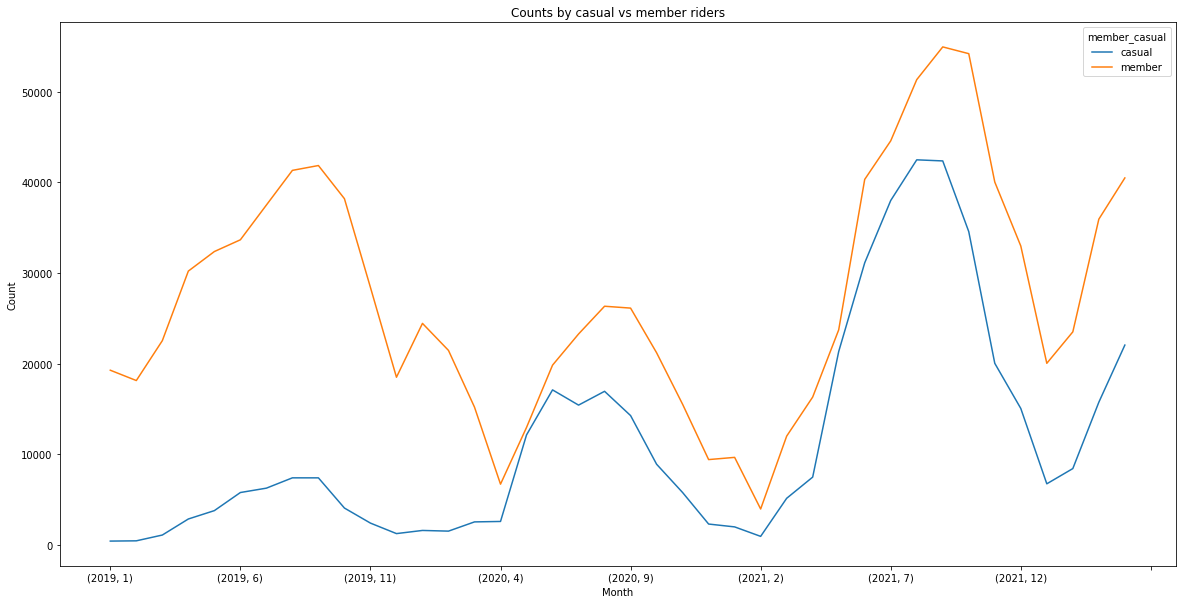

In [ ]:
#This line chart illustrates monthly trends for each year
df_monthly.plot.line(figsize = (20, 10), xlabel = "Month", ylabel = "Count", grid = False, title = "Counts by casual vs member riders")

In [ ]:
#Create a pivot table that illustrates how monthly counts change every year
df_month_year = df.pivot_table(
      values='ride_id', index=('month'), columns='year',
      fill_value=0, aggfunc='count')
#Highlight the largest/the smallest counts for each year
df_month_year.style.highlight_max(color = 'pink', axis = 0).highlight_min(color = 'lightgreen', axis = 0)

year,2019,2020,2021,2022
month,,,,
1,19676,26020,11624,26762
2,18565,22962,4881,31911
3,23606,17719,17123,51671
4,33056,9268,23774,62528
5,36135,25077,45043,0
6,39430,36921,71442,0
7,43746,38680,82578,0
8,48711,43267,93821,0
9,49244,40382,97313,0


In [ ]:
#Create a pivot table that shows annual counts

df_year = df.pivot_table(
      values='ride_id', columns='year',
      fill_value=0, aggfunc='count') 
df_year.style.highlight_max(color = 'pink', axis = 0).highlight_min(color = 'lightgreen', axis = 0)

year,2019,2020,2021,2022
ride_id,404947,323351,644443,172872


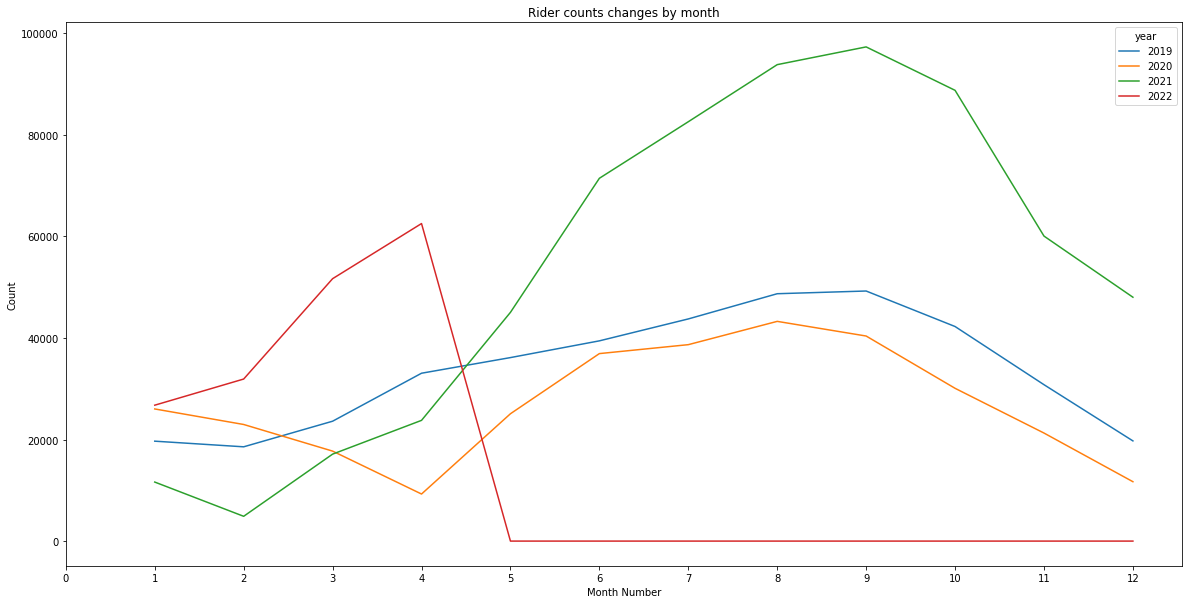

In [ ]:
#This line chart illustrates monthly trends for each year
df_month_year.plot.line(figsize = (20, 10), xticks=np.arange(0,13,1), xlabel = "Month Number", ylabel = "Count", grid = False, title = "Rider counts changes by month")

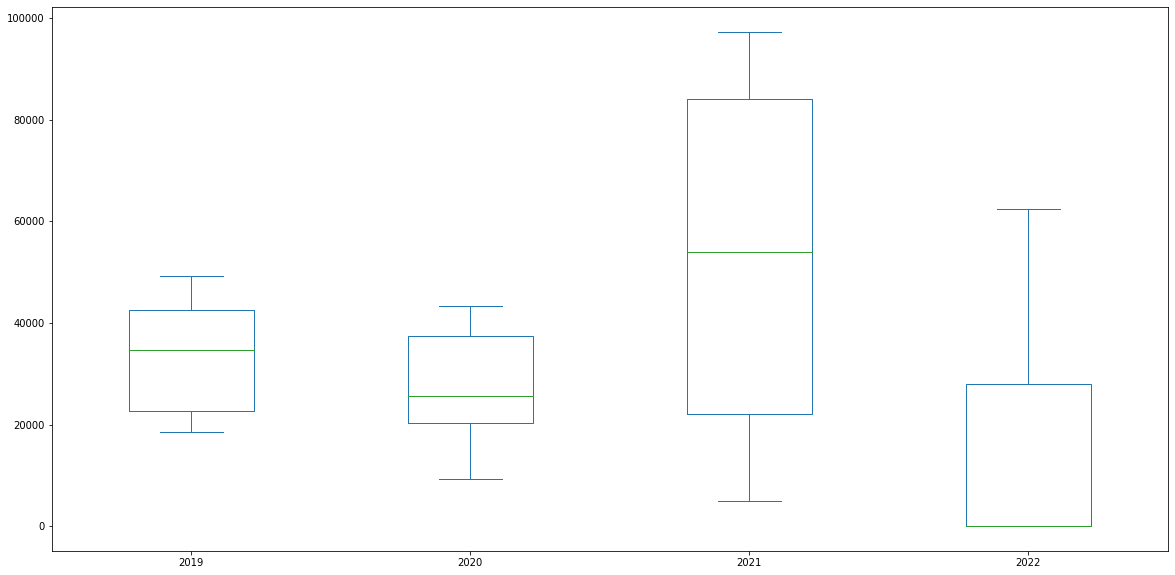

In [ ]:
#Use boxplot to show overall trend and spread of monthly counts for each year.
df_monthly.plot.box(figsize = (20, 10))

In [ ]:
#Create a pivot table that illustrates how daily ride counts change
df_daily = df.pivot_table(
      values='ride_id', index=('date'), columns='year',
      fill_value=0, aggfunc='count')
#Highlight the largest/the smallest values for each year 
df_daily.style.highlight_max(color = 'pink', axis = 0).highlight_min(color = 'lightgreen', axis = 0)

year,2019,2020,2021,2022
date,,,,
2019-01-01,431,0,0,0
2019-01-02,827,0,0,0
2019-01-03,860,0,0,0
2019-01-04,900,0,0,0
2019-01-05,308,0,0,0
2019-01-06,510,0,0,0
2019-01-07,820,0,0,0
2019-01-08,887,0,0,0
2019-01-09,847,0,0,0


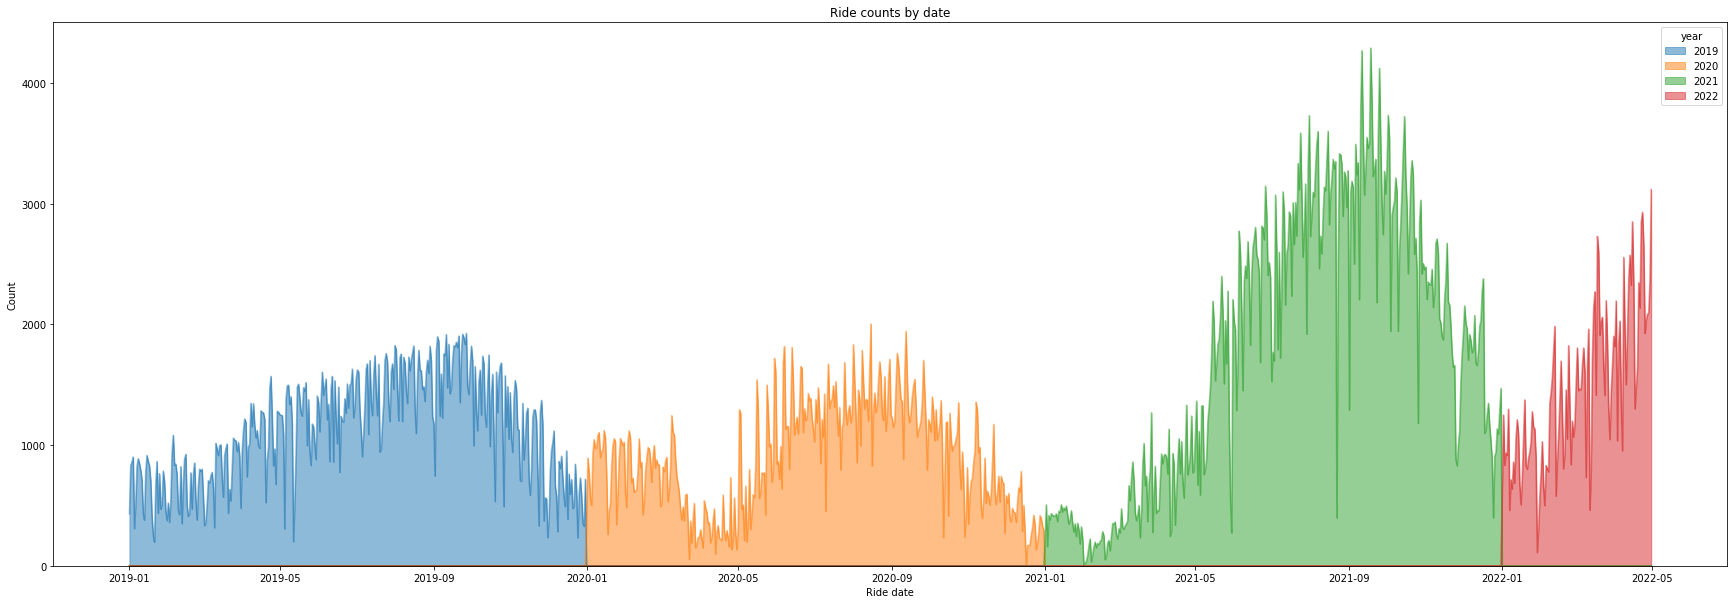

In [ ]:
#Create plot chart that shows daily trends, compare stacked vs. unstacked settings
df_daily.plot.area(figsize = (30, 10), xlabel = "Ride date", ylabel = "Count", stacked = False, title = "Ride counts by date")

In [ ]:
#Create a pivot table that illustrates how monthly ride counts change for each year
df_monthly = df.pivot_table(
      values='ride_id', index=('month'), columns='year',
      fill_value=0, aggfunc='count')

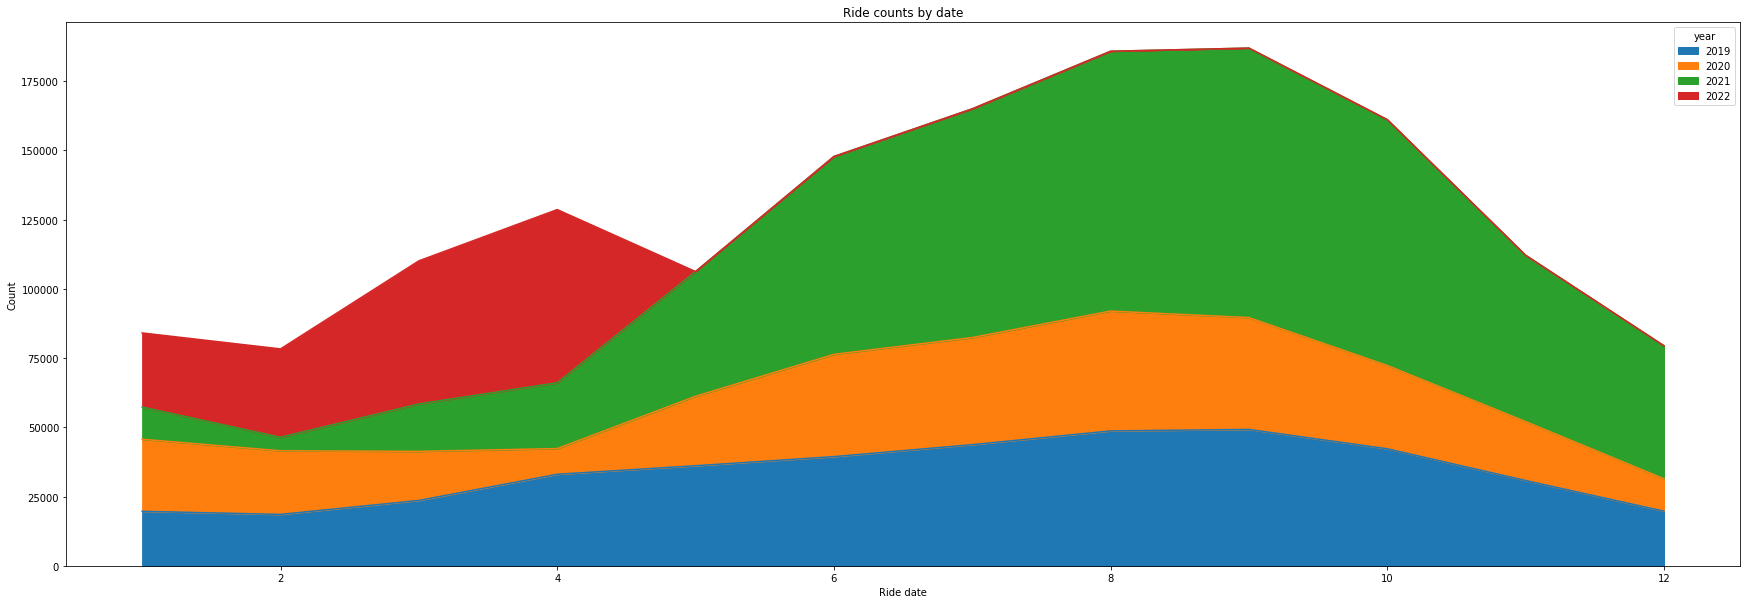

In [ ]:
#Create plot chart that shows daily trends, compare stacked vs. unstacked settings
df_monthly.plot.area(figsize = (30, 10), xlabel = "Ride date", ylabel = "Count", stacked = True, title = "Ride counts by date")

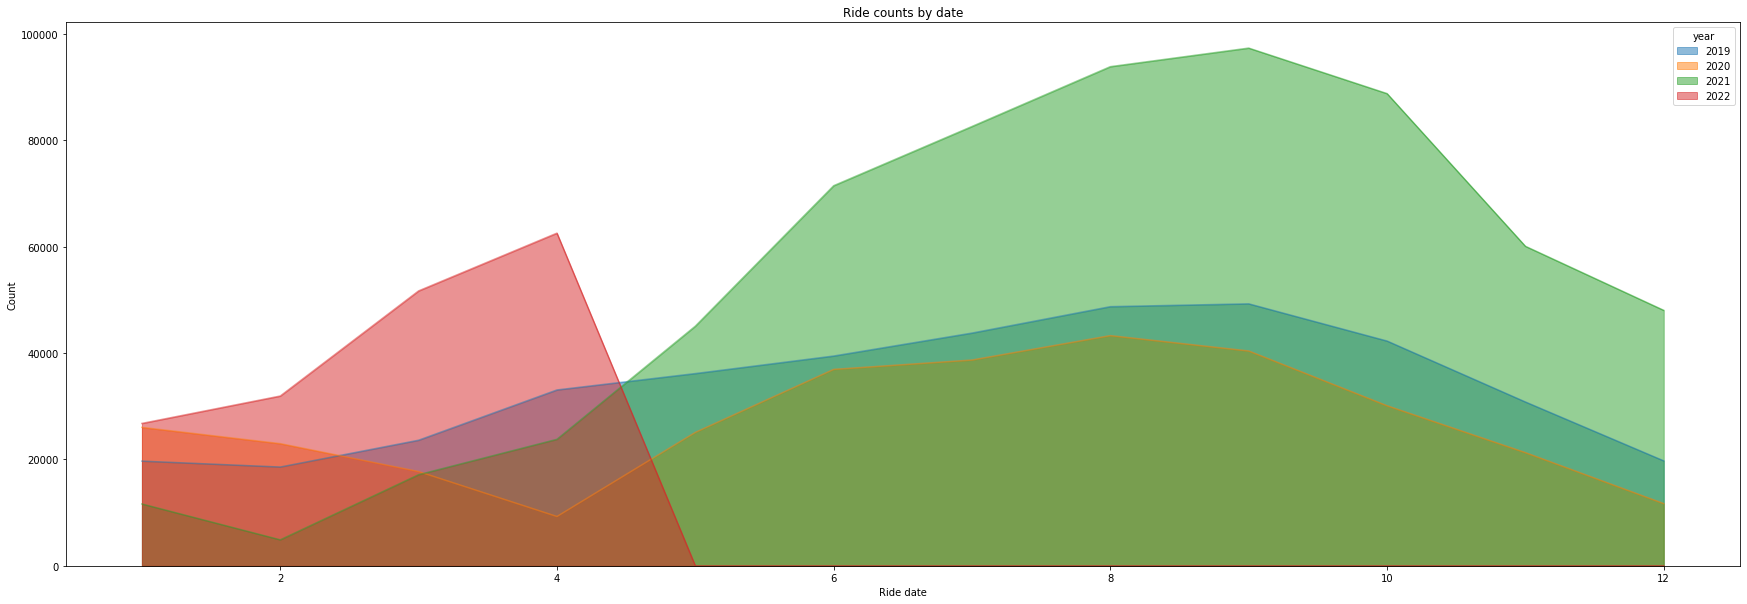

In [ ]:
#Example of regular area plot.
df_monthly.plot.area(figsize = (30, 10), xlabel = "Ride date", ylabel = "Count", stacked = False, title = "Ride counts by date")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89e3ab8d50>,
      dtype=object)

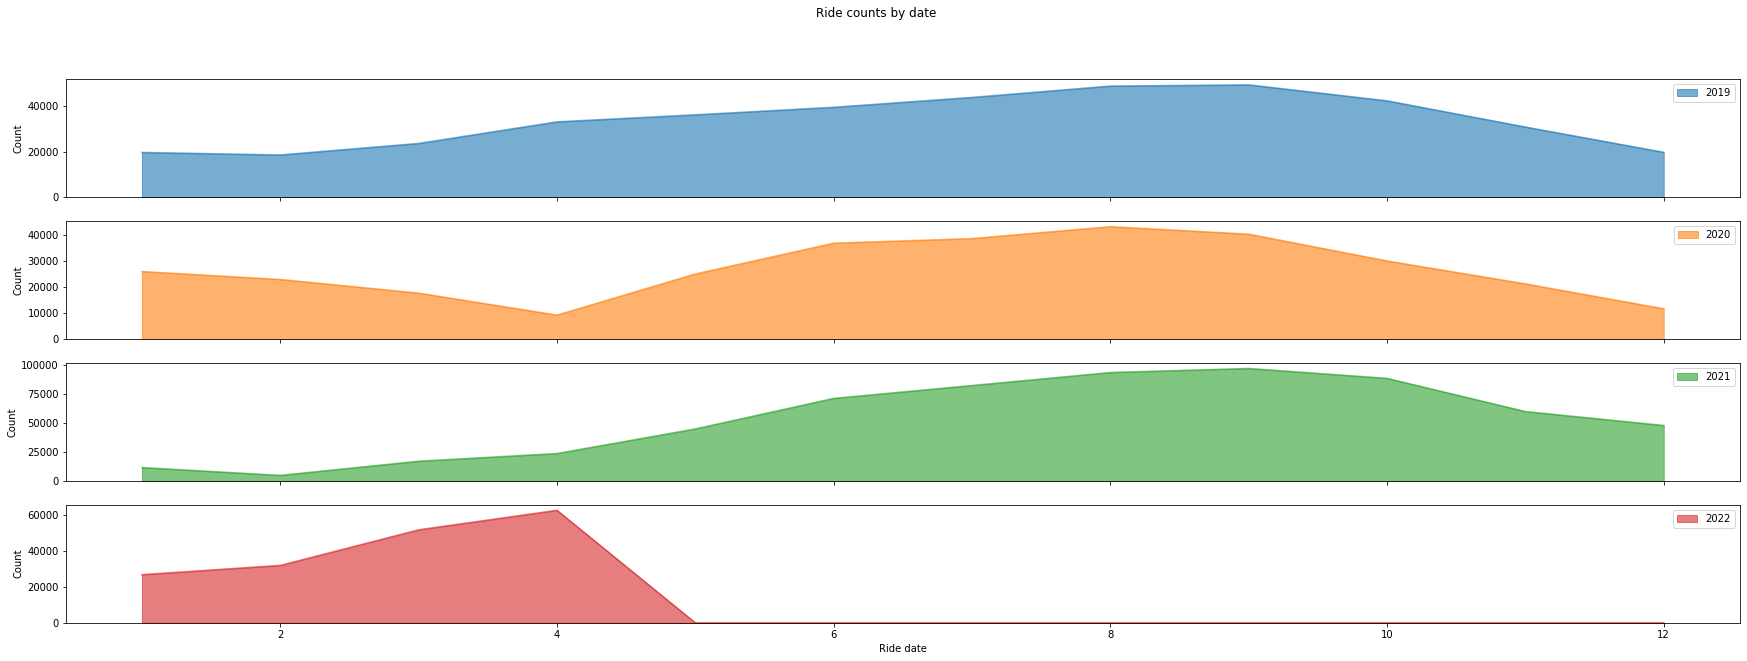

In [ ]:
#Create sub-plots for every year for comparison
df_monthly.plot.area(figsize = (30, 10), xlabel = "Ride date", ylabel = "Count", stacked = False, title = "Ride counts by date", alpha = .6, subplots = True )

In [ ]:
#Create a pivot table that illustrates how daily ride counts change for each year
df_day_mo = df.pivot_table(
      values='ride_id', index=('month_day', 'month', 'day'), columns='year',
      fill_value=0, aggfunc='count')
#Highlight min/max values for each year 
df_day_mo.style.highlight_max(color = 'pink', axis = 0).highlight_min(color = 'lightgreen', axis = 0)

,,year,2019,2020,2021,2022
month_day,month,day,,,,
10_1,10,1,1819,1166,3312,0
10_10,10,10,1735,1368,1942,0
10_11,10,11,1673,1009,2626,0
10_12,10,12,1251,234,2834,0
10_13,10,13,1149,754,3117,0
10_14,10,14,1495,1186,3443,0
10_15,10,15,1746,1192,3720,0
10_16,10,16,987,413,3224,0
10_17,10,17,1420,1263,2968,0


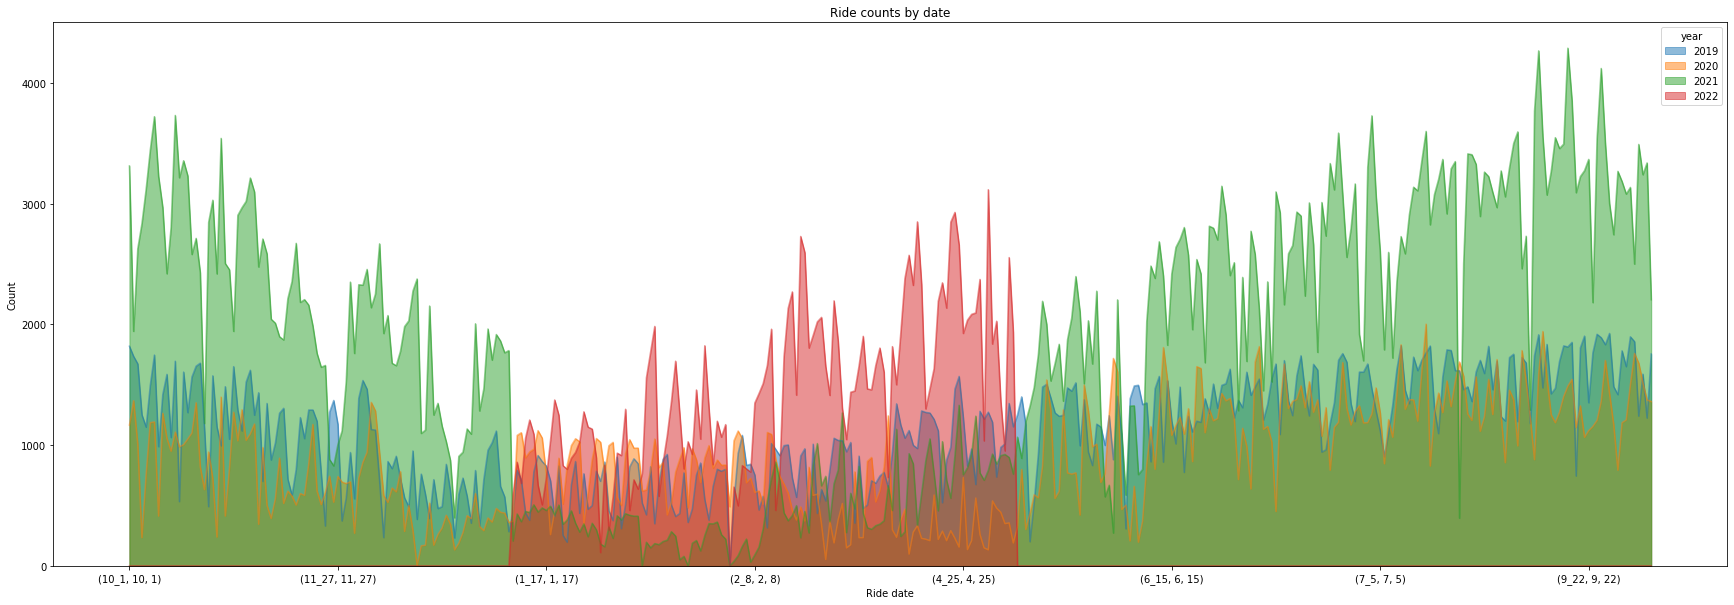

In [ ]:
#Create plot chart that shows daily trends, compare stacked vs. unstacked settings
df_day_mo.plot.area(figsize = (30, 10), xlabel = "Ride date", ylabel = "Count", stacked = False, title = "Ride counts by date")

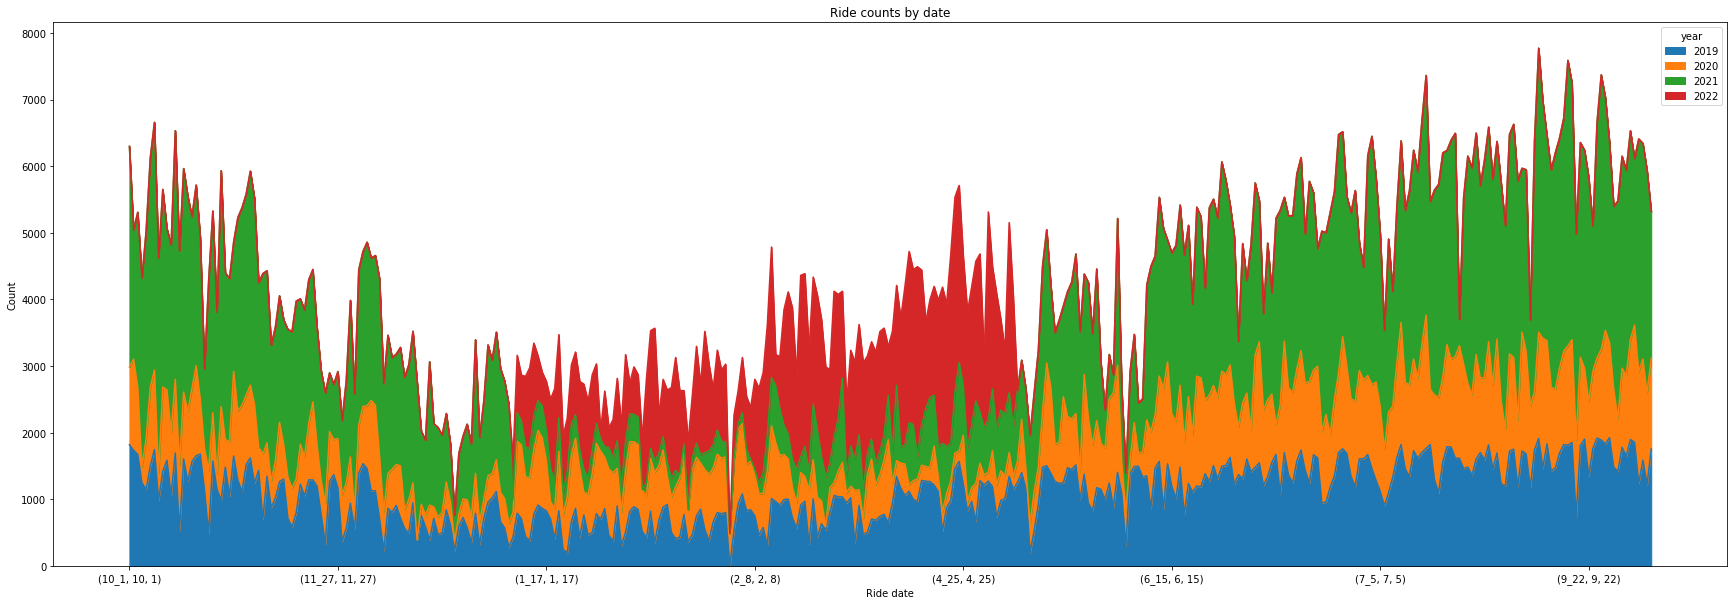

In [ ]:
#Create plot chart that shows daily trends, compare stacked vs. unstacked settings
df_day_mo.plot.area(figsize = (30, 10), xlabel = "Ride date", ylabel = "Count", stacked = True, title = "Ride counts by date")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f89e36d1b50>,
      dtype=object)

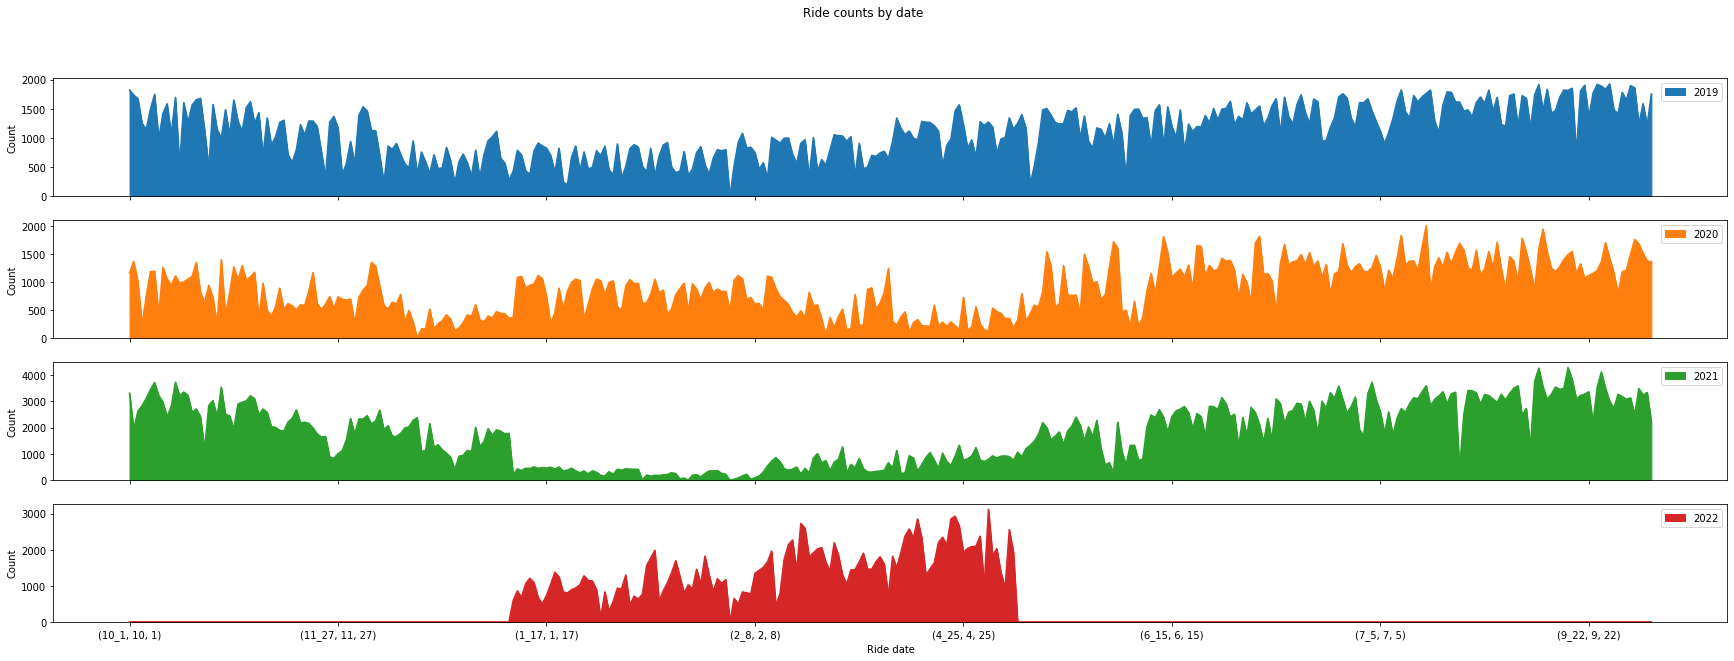

In [ ]:
#Create plot chart that shows daily trends, compare stacked vs. unstacked settings
df_day_mo.plot.area(figsize = (30, 10), xlabel = "Ride date", ylabel = "Count", stacked = True, title = "Ride counts by date", subplots = True)

In [ ]:
#Create a pivot table for casual vs. member counts by starting location
df_all = df.pivot_table(values='ride_id', index=('start_station_name'),  columns= 'member_casual',fill_value=0, aggfunc='count', margins = False)
df_all

member_casual,casual,member
start_station_name,,
11 St & Washington St,8809,8655
12 St & Sinatra Dr N,4680,3688
14 St Ferry - 14 St & Shipyard Ln,8647,5922
2 St HBLR - 2 St & Marshall St,404,364
4 St & Grand St,3595,4010
...,...,...
Van Vorst Park,5515,20578
Warren St,7765,25842
Washington St,10114,24048


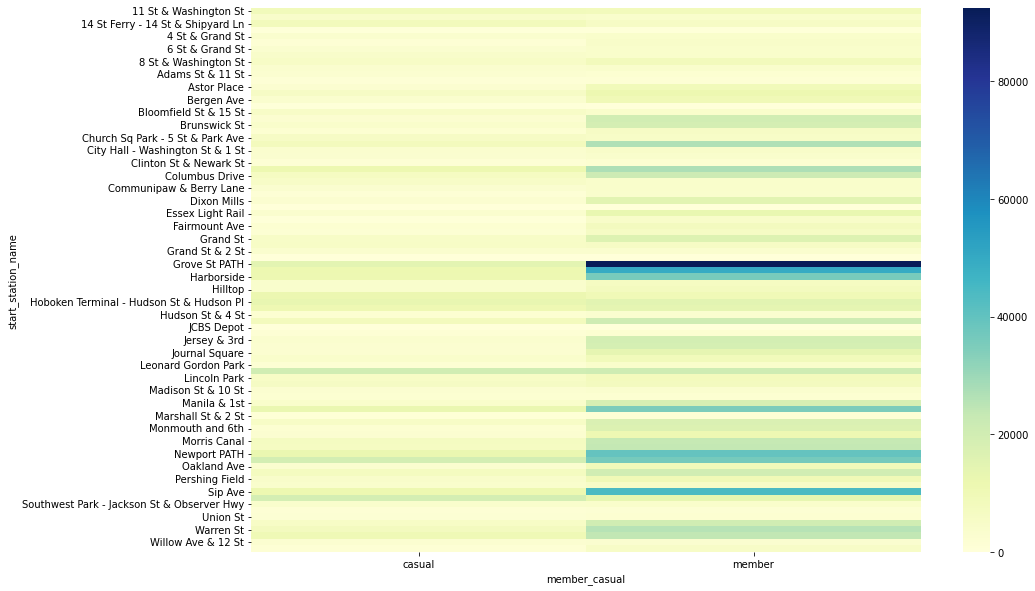

In [ ]:
#I am using seaborn heatmap to show volume trends. As we can see, male black age of 25-44 have the largest crime rates, followed by white hispanic male age 25-44.
import matplotlib.pyplot as plt
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(15,10))

# Create heatmap  - shows counts concentration by race/gender and age group
sns.heatmap(df_all, cmap="YlGnBu", annot=False, cbar=True)

# Trip duration analysis

In [ ]:
#Pivot table with average trip durations per year 
df_avg = df.pivot_table(values='diff_minutes', index=('year'),  fill_value=0, aggfunc='mean', margins = False)
df_avg

,diff_minutes
year,
2019,12.105708
2020,26.538080
2021,22.068439
2022,17.500227


In [ ]:
#Pivot table with average trip durations per year per month
df_avg_mo = df.pivot_table(values='diff_minutes', index=('month'), columns= 'year', fill_value=0, aggfunc='mean', margins = False)
df_avg_mo

year,2019,2020,2021,2022
month,,,,
1,7.457170,9.023273,16.427288,24.595188
2,10.097359,11.103194,60.078362,15.679790
3,9.116377,23.090310,23.403196,15.011016
4,11.908215,30.069935,24.441782,17.449636
5,13.743652,40.770369,21.972594,0.000000
6,16.236519,38.284751,31.554649,0.000000
7,13.543580,30.703719,23.674002,0.000000
8,13.056177,28.548008,20.212655,0.000000
9,13.524186,28.559849,19.523550,0.000000


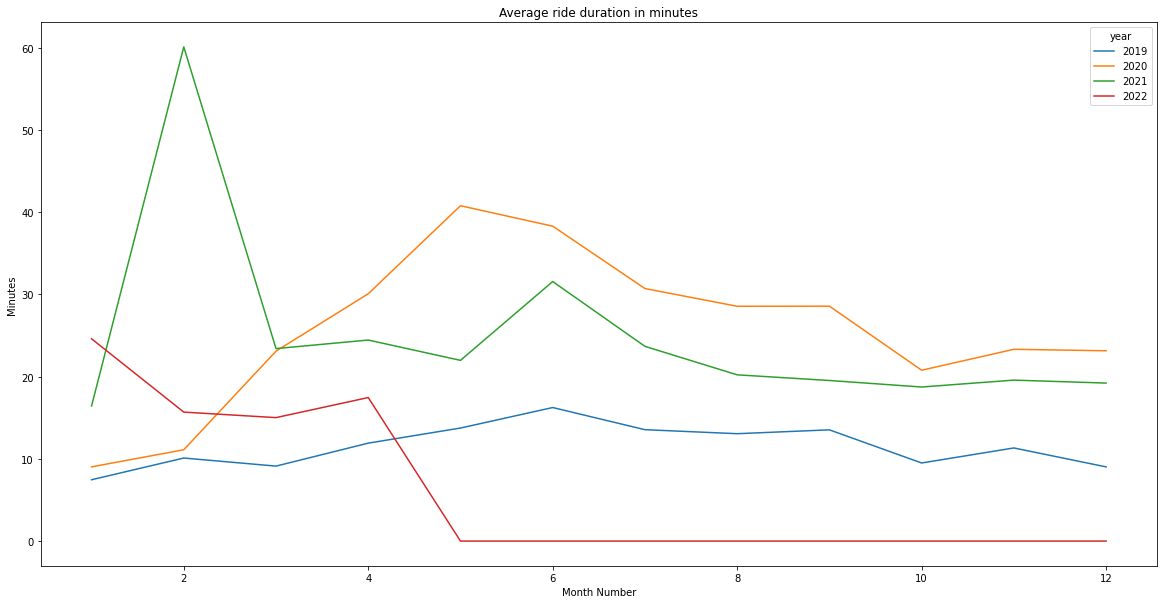

In [ ]:
#This line chart shows monthly changes in average ride duration
df_avg_mo.plot.line(figsize = (20, 10), xlabel = "Month Number", ylabel = "Minutes", grid = False, title = "Average ride duration in minutes")

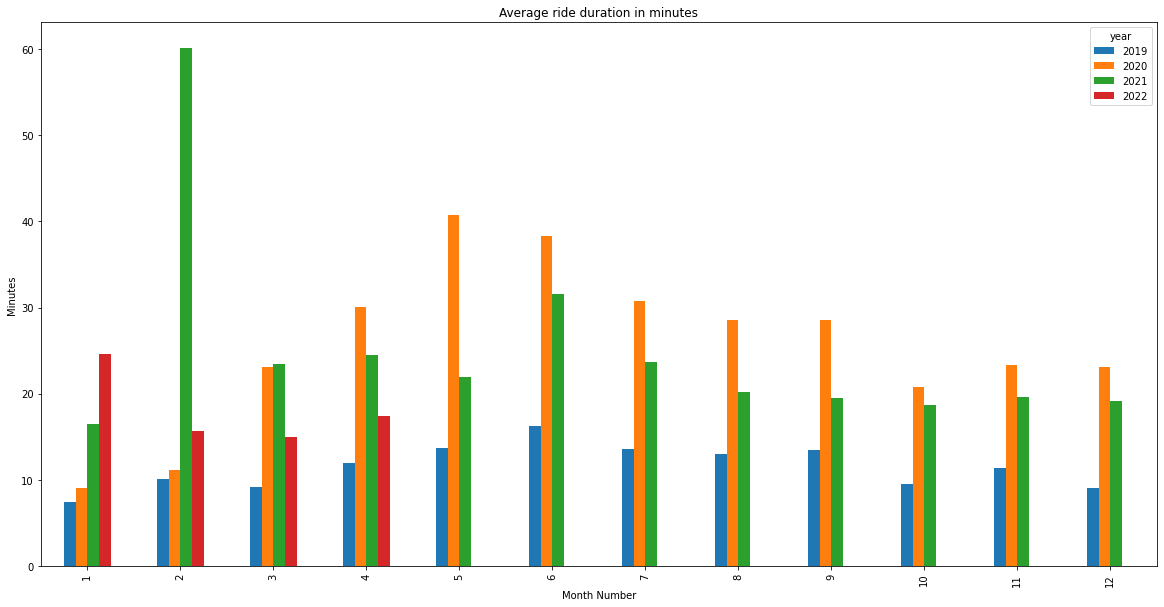

In [ ]:
#Same data formatted as a bar chart for comparison; it shows monthly changes in average ride duration
df_avg_mo.plot.bar(figsize = (20, 10), xlabel = "Month Number", ylabel = "Minutes", grid = False, title = "Average ride duration in minutes")

# The most popular destinations

In [ ]:
#Show casusal vs. member counts by destination station
df_destination = df.pivot_table(values='ride_id', index=('end_station_name'),  columns= 'member_casual',fill_value=0, aggfunc='count', margins = False)
df_destination

member_casual,casual,member
end_station_name,,
1 Ave & E 16 St,2,0
1 Ave & E 5 St,1,0
1 Ave & E 6 St,0,1
10 Ave & W 14 St,3,2
10 Ave & W 28 St,1,1
...,...,...
Willoughby Ave & Hall St,1,0
Willow Ave & 12 St,2931,2993
Withers St & Kingsland Ave,0,1


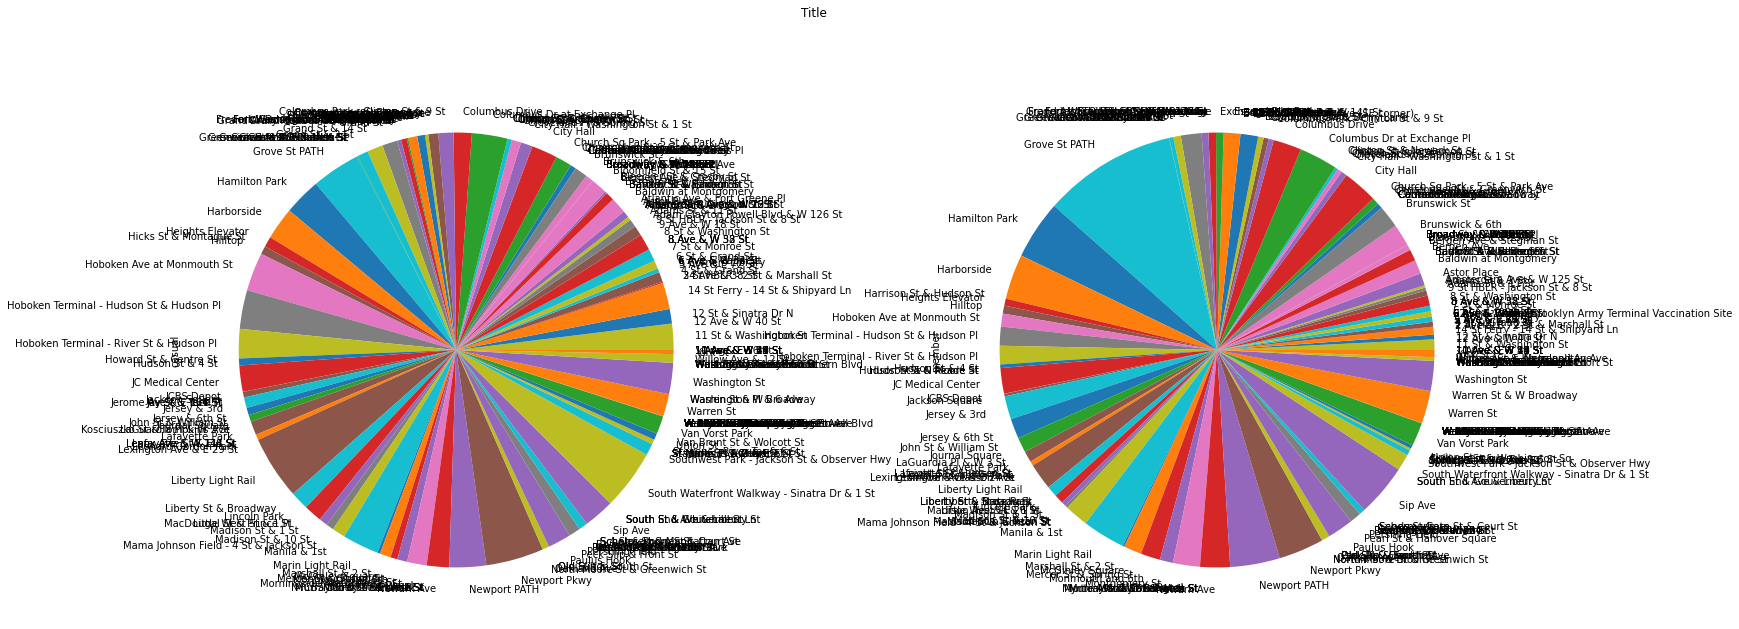

In [ ]:
#This pie-chart illlustrated ride count distribution by destination location for casual vs. member riders
plot = df_destination.plot.pie(subplots=True, figsize=(25, 10), title = "Title", legend=False)

In [ ]:
#Find top 5 destinations across all riders
df.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending = False)

end_station_name
Grove St PATH                        124288
Hamilton Park                         60008
Newport Pkwy                          56086
Sip Ave                               52786
Newport PATH                          52562
                                      ...  
E 30 St & Park Ave S                      1
E 33 St & 5 Ave                           1
E 4 St & 2 Ave                            1
E 41 St & Madison Ave (SE corner)         1
Jay St & Tech Pl                          1
Name: ride_id, Length: 372, dtype: int64

In [ ]:
#Create data frame with member rider data.
df_member = df[(df['member_casual'] =='member')]
df_member.shape

(1088258, 18)

In [ ]:
#Find top 5 destinations across "member" riders
df_member.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending = False)

end_station_name
Grove St PATH                                              107774
Hamilton Park                                               47451
Sip Ave                                                     42398
Newport PATH                                                40147
Newport Pkwy                                                36525
                                                            ...  
Riverside Dr & W 72 St                                          1
Riverside Dr & W 104 St                                         1
Pier 40 X2                                                      1
57 St & 1 Ave - Brooklyn Army Terminal Vaccination Site         1
1 Ave & E 6 St                                                  1
Name: ride_id, Length: 270, dtype: int64

In [ ]:
#Create data frame with casual rider data.
df_casual = df[(df['member_casual'] =='casual')]
df_casual.shape

(457355, 18)

In [ ]:
#Find top 5 destinations across "casual" riders
df_casual.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending = False)

end_station_name
Liberty Light Rail                              21486
South Waterfront Walkway - Sinatra Dr & 1 St    20248
Newport Pkwy                                    19561
Grove St PATH                                   16514
Hoboken Terminal - Hudson St & Hudson Pl        13123
                                                ...  
Greenwich St & Hubert St                            1
Pershing Square North                               1
6 Ave & Canal St                                    1
Peck Slip & Front St                                1
E 88 St & Park Ave                                  1
Name: ride_id, Length: 270, dtype: int64